In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [77]:
df=pd.read_csv('HR analytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [78]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [79]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [80]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [81]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [82]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [83]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [84]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


High standard deviation are present in Age, DailyRate, DistanceFromHome, EmployeeNumber, TotalWorkingYears, YearsAtCompany
variables means data is spread to much. Range is high thats mean there is high possibilities outliers

In [85]:
import warnings
warnings.filterwarnings('ignore')

df.skew()


Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

JobLevel, MonthlyIncome, PercentSalaryHike, PerformanceRating, WorkLifeBalance  variables are skewed

<AxesSubplot:>

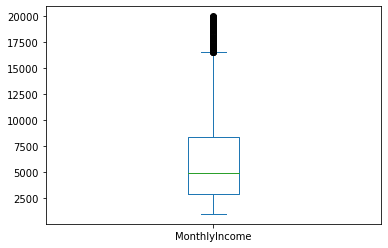

In [86]:
df['MonthlyIncome'].plot.box()

<AxesSubplot:>

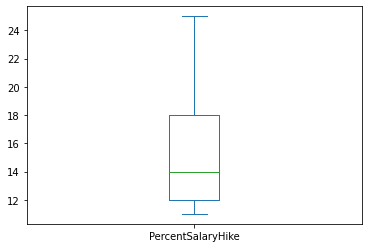

In [87]:
df['PercentSalaryHike'].plot.box()

<AxesSubplot:>

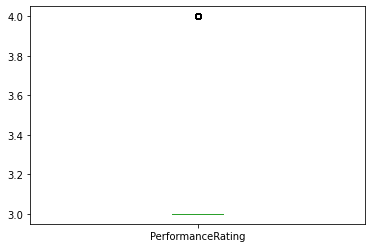

In [88]:
df['PerformanceRating'].plot.box()

<AxesSubplot:>

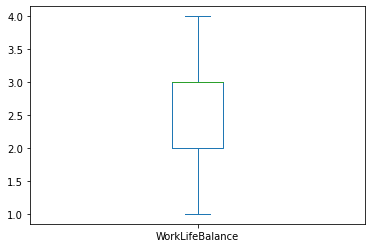

In [89]:
df['WorkLifeBalance'].plot.box()

In [90]:
#Removing outliers

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,1.010909,0.891688,0.937414,NaN,1.701283,...,1.584178,NaN,0.932014,0.421642,2.171982,2.493820,0.164613,0.063296,0.679146,0.245834
1,1.322365,0.438422,0.913194,1.297775,0.493817,0.147150,1.868426,0.937414,NaN,1.699621,...,1.191438,NaN,0.241988,0.164511,0.155707,0.338096,0.488508,0.764998,0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,0.493817,0.887515,0.891688,1.316673,NaN,1.696298,...,0.658973,NaN,0.932014,0.550208,0.155707,0.338096,1.144294,1.167687,0.679146,1.155935
3,0.429664,0.438422,0.913194,1.461466,0.493817,0.764121,1.061787,0.937414,NaN,1.694636,...,0.266233,NaN,0.932014,0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,1.155935
4,1.086676,0.438422,0.590048,0.524295,0.493817,0.887515,1.868426,0.565311,NaN,1.691313,...,1.191438,NaN,0.241988,0.678774,0.155707,0.338096,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.913194,0.202082,0.493817,1.703764,0.891688,0.565311,NaN,1.721670,...,0.266233,NaN,0.241988,0.735447,0.155707,0.338096,0.327893,0.615492,0.679146,0.314873
1466,0.227347,0.438422,0.590048,0.469754,0.493817,0.393938,1.868426,0.565311,NaN,1.723332,...,1.584178,NaN,0.241988,0.293077,1.707500,0.338096,0.001333,0.764998,0.368715,0.806541
1467,1.086676,0.438422,0.590048,1.605183,0.493817,0.640727,0.085049,0.937414,NaN,1.726655,...,0.658973,NaN,0.241988,0.678774,2.171982,0.338096,0.164613,0.615492,0.679146,0.314873
1468,1.322365,0.438422,0.913194,0.546677,1.401512,0.887515,0.085049,0.565311,NaN,1.728317,...,1.191438,NaN,0.932014,0.735447,0.155707,1.077862,0.325228,0.488900,0.679146,1.086895


In [92]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([34, 33, 31, 33, 32, 33, 28, 28, 31, 33, 32, 33, 34, 28, 31, 33, 34,
       33, 28, 34, 31, 32, 33, 32, 34, 31, 33, 28, 31, 32, 33, 33, 34, 28,
       31, 31, 33, 33, 28, 32, 31, 31, 33, 31, 34, 33, 31, 28, 31, 33, 34,
       28, 34, 31, 33, 

In [93]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [94]:
# Remove skewness

In [95]:
from scipy.stats import boxcox

In [96]:
df['JobLevel']=boxcox(df['JobLevel'],0)

In [97]:
df['MonthlyIncome']=boxcox(df['MonthlyIncome'],0)

In [98]:
df['PercentSalaryHike']=boxcox(df['PercentSalaryHike'],0)

In [99]:
df['PerformanceRating']=boxcox(df['PerformanceRating'],0)

In [100]:
df['WorkLifeBalance']=boxcox(df['WorkLifeBalance'],0)

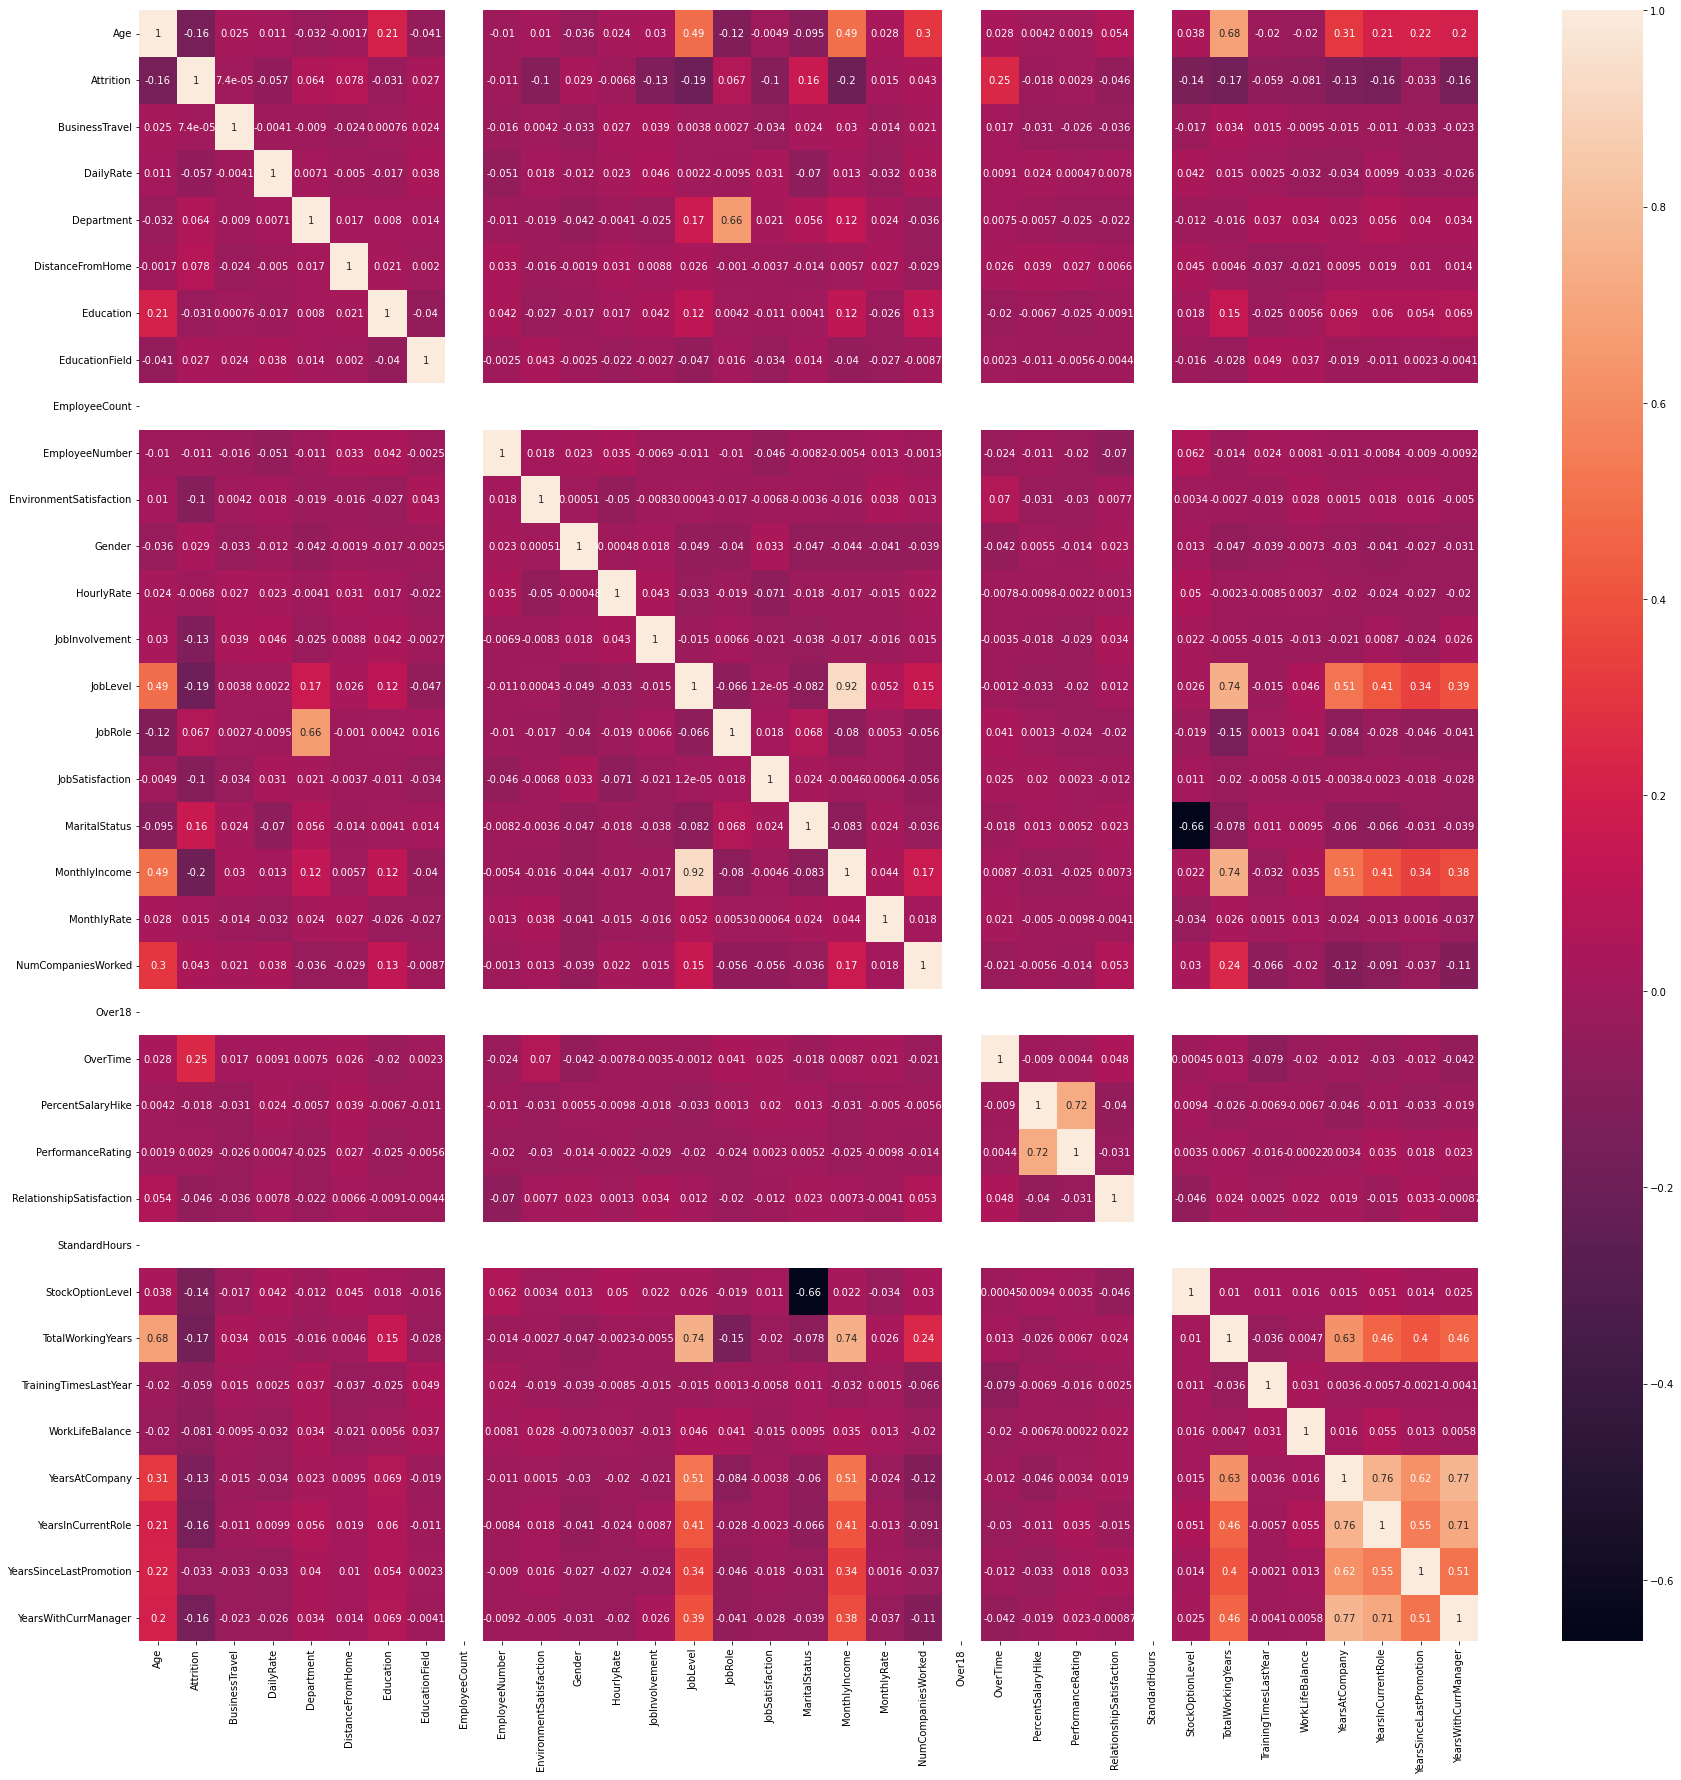

In [73]:
import matplotlib.pyplot as plt
corr_hmap=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [103]:
target = df['Attrition']
features = df.drop('Attrition', axis = 1)

In [104]:
target

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [105]:
features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,1,2,...,1,80,0,8,0,0.000000,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,1,2,3,...,4,80,1,10,3,1.098612,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,...,2,80,0,7,3,1.098612,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,...,3,80,0,8,3,1.098612,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,7,1,...,4,80,1,6,3,1.098612,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,...,3,80,1,17,3,1.098612,5,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,1,2062,4,...,1,80,1,9,5,1.098612,7,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,1,2064,2,...,2,80,1,6,0,1.098612,6,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,...,4,80,0,17,3,0.693147,9,6,0,8


In [107]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=.33,random_state=47)

In [108]:
features.shape

(1470, 34)

In [109]:
target.shape

(1470,)

In [110]:
lm=LinearRegression()

In [111]:
lm.fit(features,target)

LinearRegression()

In [112]:
lm.score(features,target)

0.22656589926509152

In [113]:
lm.coef_

array([-3.87721258e-03,  4.96820211e-04, -3.27859875e-05,  7.23746935e-02,
        3.49966780e-03,  1.01856132e-03,  5.21036809e-03, -1.41657519e-14,
       -8.05443342e-06, -4.15860063e-02,  3.49828271e-02, -2.56245463e-04,
       -6.07019033e-02, -2.27683941e-02, -4.77655958e-03, -3.83298802e-02,
        5.27912346e-02, -8.25756160e-02,  6.28766918e-07,  1.68875660e-02,
        1.11022302e-16,  2.11538631e-01, -6.77899752e-02,  8.34541330e-02,
       -2.21865714e-02, -1.04083409e-16, -2.40762070e-02, -4.95003264e-04,
       -1.21916916e-02, -7.73649107e-02,  5.68328346e-03, -9.08629080e-03,
        1.10856567e-02, -1.02677432e-02])

In [114]:
#Now lets reduce coeffficent value to the zero

In [115]:
from sklearn.linear_model import Lasso,Ridge

In [116]:
ls=Lasso(alpha=0.0001)
ls.fit(features,target)
ls.score(features,target)

0.22653493540956648

In [117]:
ls.coef_

array([-3.88460043e-03,  2.86014113e-04, -3.29379587e-05,  7.13086164e-02,
        3.49580596e-03,  8.52979291e-04,  5.16366924e-03,  0.00000000e+00,
       -8.08592743e-06, -4.15053123e-02,  3.44123292e-02, -2.53497937e-04,
       -6.05517687e-02, -2.15205350e-02, -4.64000536e-03, -3.82641740e-02,
        5.25853982e-02, -8.29045161e-02,  6.23323797e-07,  1.68560943e-02,
        0.00000000e+00,  2.11080380e-01, -5.72472179e-02,  5.73801721e-02,
       -2.20886644e-02,  0.00000000e+00, -2.40823931e-02, -5.06465318e-04,
       -1.21633742e-02, -7.63823744e-02,  5.65352421e-03, -9.06506672e-03,
        1.11016986e-02, -1.02436824e-02])

In [118]:
rd=Ridge(alpha=0.0001)
rd.fit(features,target)

Ridge(alpha=0.0001)

In [119]:
rd.coef_

array([-3.87721294e-03,  4.96819781e-04, -3.27859949e-05,  7.23746543e-02,
        3.49966792e-03,  1.01855747e-03,  5.21036802e-03,  0.00000000e+00,
       -8.05443665e-06, -4.15860023e-02,  3.49828071e-02, -2.56245400e-04,
       -6.07018977e-02, -2.27684403e-02, -4.77655489e-03, -3.83298782e-02,
        5.27912217e-02, -8.25755619e-02,  6.28766819e-07,  1.68875646e-02,
        0.00000000e+00,  2.11538561e-01, -6.77894240e-02,  8.34527327e-02,
       -2.21865687e-02,  0.00000000e+00, -2.40762128e-02, -4.95003534e-04,
       -1.21916937e-02, -7.73648562e-02,  5.68328334e-03, -9.08629089e-03,
        1.10856581e-02, -1.02677430e-02])

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [126]:
x_train.shape

(984, 34)

In [127]:
x_test.shape

(486, 34)

In [128]:
y_train.shape

(984,)

In [129]:
y_test.shape

(486,)

In [132]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [133]:
lg.fit(x_train, y_train)

LogisticRegression()

In [135]:
pred=lg.predict(x_test)
print(pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [136]:
print("accuracy_score:", accuracy_score(pred,y_test))

accuracy_score: 0.8333333333333334


In [137]:
print(confusion_matrix(y_test,pred))

[[405   0]
 [ 81   0]]


In [138]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [139]:
y_pred_prob=lg.predict_proba(x_test)[:,-1]

In [140]:
y_pred_prob

array([0.24099167, 0.11186284, 0.38109593, 0.1639495 , 0.06910783,
       0.18005622, 0.01241266, 0.18525224, 0.20787595, 0.30301403,
       0.3115798 , 0.0500826 , 0.01822049, 0.25869714, 0.07229877,
       0.26758532, 0.1201382 , 0.03564826, 0.25227551, 0.21117806,
       0.06529274, 0.18372129, 0.20427902, 0.11559254, 0.28372124,
       0.20952572, 0.12981642, 0.3430102 , 0.02925823, 0.18715537,
       0.11284212, 0.03933621, 0.1387368 , 0.10618678, 0.25186768,
       0.44405746, 0.0600707 , 0.49838061, 0.24854647, 0.18958011,
       0.19938653, 0.1596494 , 0.03763074, 0.20623287, 0.05873055,
       0.1690382 , 0.01277654, 0.20922819, 0.15910175, 0.07042177,
       0.11933273, 0.36304119, 0.37228955, 0.18289022, 0.21023489,
       0.0924189 , 0.19758476, 0.11743289, 0.32822244, 0.05134837,
       0.15436409, 0.12296726, 0.1170378 , 0.11387886, 0.20751206,
       0.06929904, 0.09641743, 0.08702662, 0.19451819, 0.16795994,
       0.1710689 , 0.02530379, 0.09500328, 0.1906714 , 0.30655

In [141]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [142]:
fpr

array([0.        , 0.00246914, 0.00493827, 0.00493827, 0.00740741,
       0.00740741, 0.01481481, 0.01481481, 0.01975309, 0.01975309,
       0.02222222, 0.02222222, 0.04197531, 0.04197531, 0.04938272,
       0.04938272, 0.05185185, 0.05185185, 0.0617284 , 0.0617284 ,
       0.06419753, 0.06419753, 0.0691358 , 0.0691358 , 0.07160494,
       0.07160494, 0.08888889, 0.08888889, 0.09135802, 0.09135802,
       0.10123457, 0.10123457, 0.1037037 , 0.1037037 , 0.11111111,
       0.11111111, 0.12345679, 0.12345679, 0.12839506, 0.12839506,
       0.13333333, 0.13333333, 0.14320988, 0.14320988, 0.15061728,
       0.15061728, 0.17283951, 0.17283951, 0.19259259, 0.19259259,
       0.2       , 0.2       , 0.20246914, 0.20246914, 0.24938272,
       0.24938272, 0.28148148, 0.28148148, 0.29135802, 0.29135802,
       0.29876543, 0.29876543, 0.3382716 , 0.3382716 , 0.39506173,
       0.39506173, 0.4345679 , 0.4345679 , 0.43703704, 0.43703704,
       0.43950617, 0.43950617, 0.45679012, 0.45679012, 0.46172

In [143]:
tpr

array([0.        , 0.        , 0.        , 0.02469136, 0.02469136,
       0.04938272, 0.04938272, 0.07407407, 0.07407407, 0.11111111,
       0.11111111, 0.12345679, 0.12345679, 0.13580247, 0.13580247,
       0.14814815, 0.14814815, 0.16049383, 0.16049383, 0.18518519,
       0.18518519, 0.19753086, 0.19753086, 0.22222222, 0.22222222,
       0.2345679 , 0.2345679 , 0.24691358, 0.24691358, 0.25925926,
       0.25925926, 0.27160494, 0.27160494, 0.28395062, 0.28395062,
       0.32098765, 0.32098765, 0.33333333, 0.33333333, 0.34567901,
       0.34567901, 0.37037037, 0.37037037, 0.38271605, 0.38271605,
       0.39506173, 0.39506173, 0.40740741, 0.40740741, 0.41975309,
       0.41975309, 0.43209877, 0.43209877, 0.45679012, 0.45679012,
       0.4691358 , 0.4691358 , 0.48148148, 0.48148148, 0.49382716,
       0.49382716, 0.50617284, 0.50617284, 0.51851852, 0.51851852,
       0.5308642 , 0.5308642 , 0.54320988, 0.54320988, 0.55555556,
       0.55555556, 0.56790123, 0.56790123, 0.58024691, 0.58024

In [144]:
thresholds

array([1.49838061, 0.49838061, 0.49463941, 0.46610376, 0.44580813,
       0.43399763, 0.40272367, 0.39554964, 0.38109593, 0.36872044,
       0.36304119, 0.3623623 , 0.33903472, 0.33810196, 0.33325802,
       0.32859102, 0.32822244, 0.3251876 , 0.3115798 , 0.31074134,
       0.30942784, 0.30744439, 0.30301403, 0.30251951, 0.30149882,
       0.30055062, 0.29203868, 0.29146803, 0.28960242, 0.28706694,
       0.27808898, 0.27457646, 0.27124114, 0.27084152, 0.26744725,
       0.26596543, 0.25866128, 0.25857091, 0.25617411, 0.25348644,
       0.25186768, 0.24974261, 0.24687103, 0.24523923, 0.2414268 ,
       0.24099167, 0.23492038, 0.23491295, 0.224776  , 0.22149528,
       0.21560178, 0.21366029, 0.21332175, 0.2126334 , 0.20301153,
       0.20105466, 0.1922466 , 0.19080903, 0.18981011, 0.18958011,
       0.18715537, 0.18699732, 0.18095742, 0.18046077, 0.16869884,
       0.1680128 , 0.15978818, 0.1596494 , 0.15910175, 0.15861026,
       0.15809861, 0.15754533, 0.15434234, 0.15326581, 0.15142

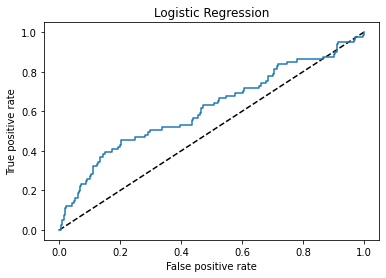

In [145]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [146]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [147]:
print(auc_score)

0.5


In [148]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
ac=accuracy_score(y_test,p)
round(ac,3)

0.765

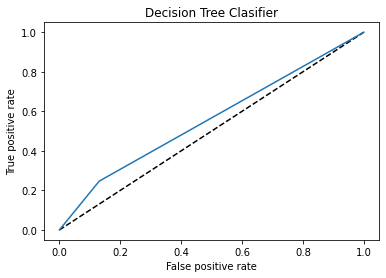

0.5580246913580247

In [149]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Clasifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score